In [12]:
import pandas as pd
pd.options.mode.chained_assignment = None 
import numpy as np
import re
import nltk
nltk.download('stopwords')
import sys
from gensim.models import word2vec

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Administrador\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
dir = 'C:/Users/Administrador/trabalho/'

In [23]:
data= pd.read_csv(dir+'Literacy_Language.txt',delimiter=';',names=['id','approved','group','stem'])

In [24]:
STOP_WORDS = nltk.corpus.stopwords.words()

def clean_sentence(val):
    "remove chars that are not letters or numbers, downcase, then remove stop words"
    regex = re.compile('([^\s\w]|_)+')
    sentence = regex.sub('', val).lower()
    sentence = sentence.split(" ")
    
    for word in list(sentence):
        if word in STOP_WORDS:
            sentence.remove(word)  
            
    sentence = " ".join(sentence)
    return sentence

def clean_dataframe(data):
    "drop nans, then apply 'clean_sentence' function to question1 and 2"
    data = data.dropna(how="any")
    
    data['stem'] = data['stem'].apply(clean_sentence)
    
    return data

data = clean_dataframe(data)
data.head(5)


id  approved              group  \
0  p036502         1  Literacy_Language   
1  p191410         1  Literacy_Language   
2  p030093         1  Literacy_Language   
3  p226941         1  Literacy_Language   
4  p173555         0  Literacy_Language   

                                                stem  
0  kindergarten student lowincom household consid...  
1  teach first grade small farm town illinoi dive...  
2  classroom student amaz group kid love learn ev...  
3  children school everyday expect ani children e...  
4  day fifth grader walk home beauti classroom re...

In [25]:
def build_corpus(data):
    "Creates a list of lists containing words from each sentence"
    corpus = []
    for col in ['stem']:
        for sentence in data[col].iteritems():
            word_list = sentence[1].split(" ")
            corpus.append(word_list)
            
    return corpus

corpus = build_corpus(data)        
corpus[0:1]

[['kindergarten',
  'student',
  'lowincom',
  'household',
  'consid',
  'atrisk',
  'kid',
  'walk',
  'school',
  'alongsid',
  'parent',
  'never',
  'walk',
  'distanc',
  'hous',
  'student',
  'english',
  'first',
  'languag',
  'languag',
  'spoken',
  'home',
  'kindergarten',
  'kid',
  'mani',
  'obstacl',
  'front',
  'school',
  'day',
  'excit',
  'readi',
  'learn',
  'student',
  'start',
  'year',
  'never',
  'school',
  'set',
  'start',
  'year',
  'mani',
  'never',
  'expos',
  'letter',
  'day',
  'soak',
  'knowledg',
  'tri',
  'hardest',
  'succeed',
  'high',
  'motiv',
  'learn',
  'new',
  'thing',
  'everi',
  'day',
  'halfway',
  'year',
  'start',
  'take',
  'know',
  'know',
  'letter',
  'sight',
  'word',
  'number',
  'major',
  'letter',
  'sound',
  'becaus',
  'hard',
  'work',
  'determin',
  'excit',
  'see',
  'place',
  'go',
  'herei',
  'current',
  'differenti',
  'sight',
  'word',
  'center',
  'daili',
  'dure',
  'literaci',
  'stati

In [26]:
model = word2vec.Word2Vec(corpus, size=100, window=20, min_count=50, workers=4)
model.wv['histori']

array([-3.2019825e-03, -8.4524590e-01, -1.7952040e+00, -2.1749053e+00,
        2.4777958e+00, -5.2045784e+00,  8.4509027e-01, -9.9108297e-01,
       -1.7377800e+00,  1.2828690e+00, -3.3512208e+00, -4.8895431e+00,
       -1.3032904e+00,  9.0724331e-01, -1.3770720e+00,  1.9737856e+00,
       -2.9825959e+00, -1.3002930e+00, -3.0663338e+00,  2.0770540e+00,
       -1.6271937e+00,  2.0949841e+00, -3.1301832e+00,  4.7597513e+00,
       -4.4876719e+00,  1.2922175e+00,  3.0500169e+00, -2.7877598e+00,
        3.4835857e-01, -2.4369946e+00, -6.6420126e-01,  1.9229038e+00,
       -2.3830777e-01, -2.6194627e+00, -1.0920285e+00,  2.4025357e+00,
        1.8811327e+00,  1.4137299e+00,  6.0953677e-01, -5.5476719e-01,
        8.1772649e-01, -1.5485058e+00, -4.0359583e-01, -3.1186514e+00,
        1.5474294e+00, -4.1739318e-01,  1.9525563e+00, -5.1260066e+00,
       -1.0396518e+00,  1.2820729e+00, -1.2147905e+00, -2.8519058e+00,
        2.7116641e-01,  3.7862796e-01,  7.0710510e-01, -1.1718422e+00,
      

In [27]:
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

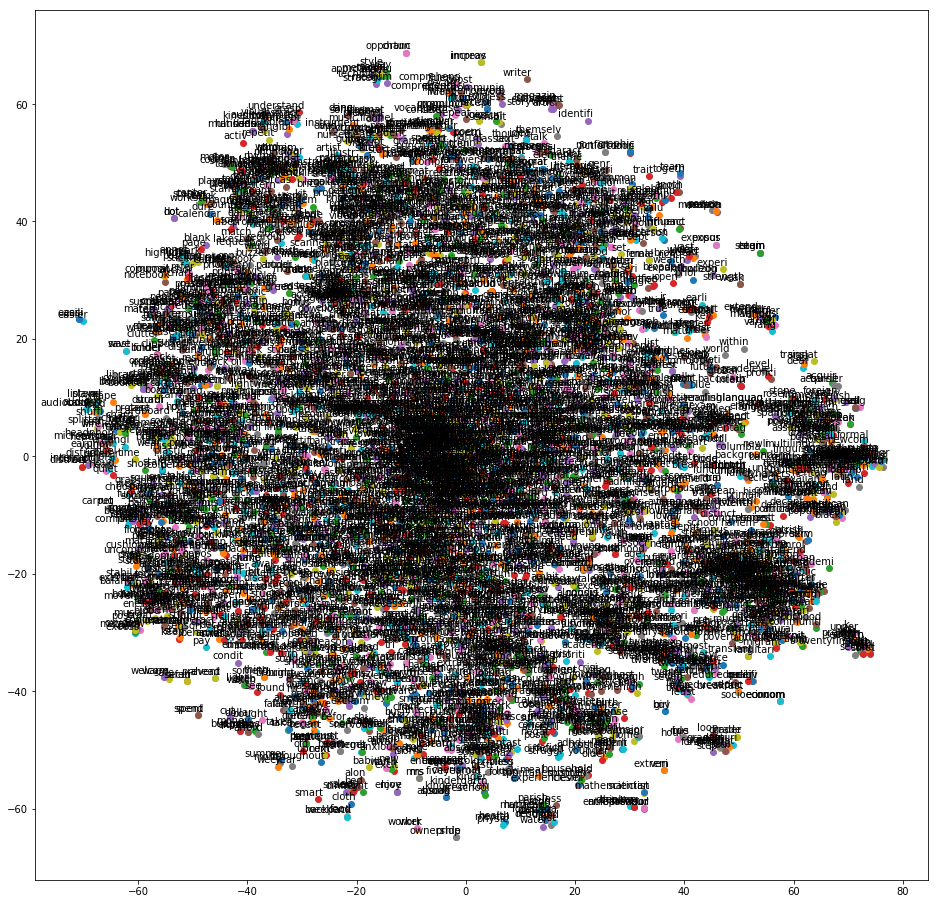

In [28]:
tsne_plot(model)

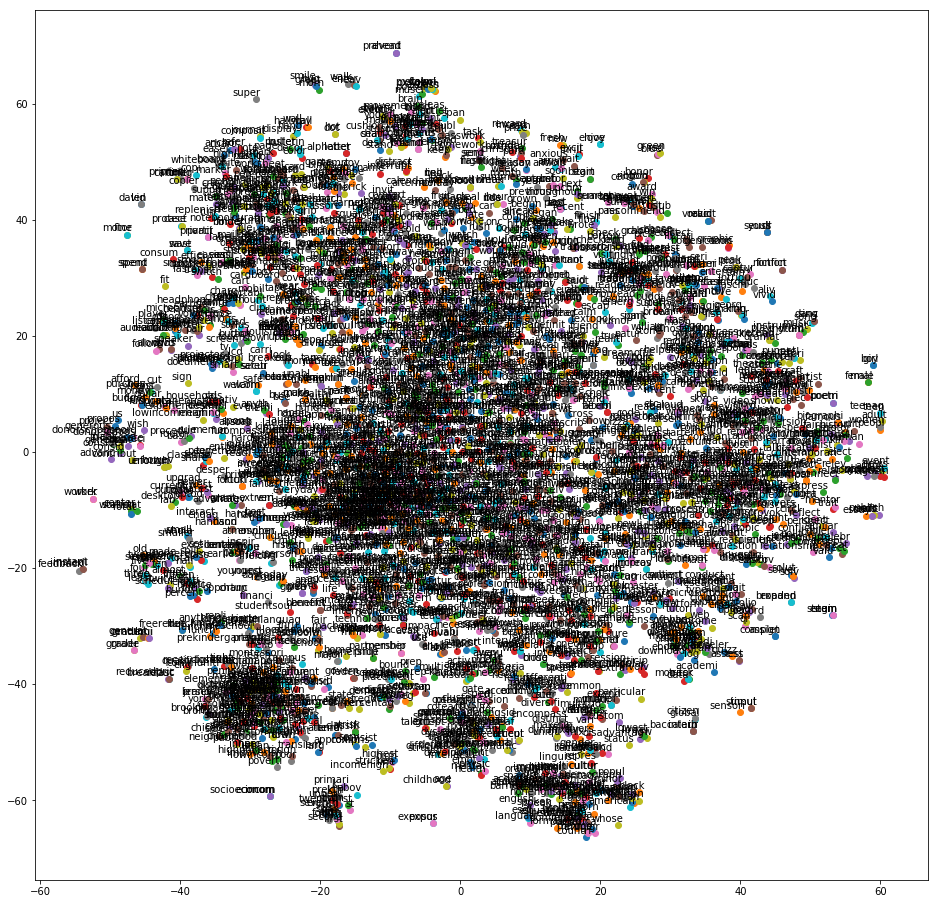

In [29]:
model = word2vec.Word2Vec(corpus, size=100, window=20, min_count=100, workers=4)
tsne_plot(model)

In [32]:
model.most_similar('book')

[('librari', 0.745947003364563),
 ('booksi', 0.722569465637207),
 ('booksmi', 0.7091317176818848),
 ('booksth', 0.7082192897796631),
 ('read', 0.7050946950912476),
 ('seri', 0.6859062910079956),
 ('select', 0.6704328656196594),
 ('chapter', 0.657942533493042),
 ('readingi', 0.6577054262161255),
 ('genr', 0.652522623538971)]

In [33]:
model.most_similar('read')

[('readingmi', 0.729387640953064),
 ('readingth', 0.717249870300293),
 ('book', 0.7050948143005371),
 ('readingi', 0.6803143620491028),
 ('readth', 0.6558325886726379),
 ('reread', 0.6525934934616089),
 ('comprehens', 0.6052731871604919),
 ('chapter', 0.5933344960212708),
 ('fluenci', 0.5915583372116089),
 ('reader', 0.5890722274780273)]

In [34]:
model.most_similar('learn')

[('learningmi', 0.6873373985290527),
 ('learningth', 0.5605716109275818),
 ('handson', 0.5343436002731323),
 ('learningi', 0.5324146151542664),
 ('learner', 0.5161681175231934),
 ('learningthes', 0.478229820728302),
 ('learnmi', 0.4671403169631958),
 ('thrive', 0.447573721408844),
 ('engag', 0.43153834342956543),
 ('fun', 0.4073237180709839)]

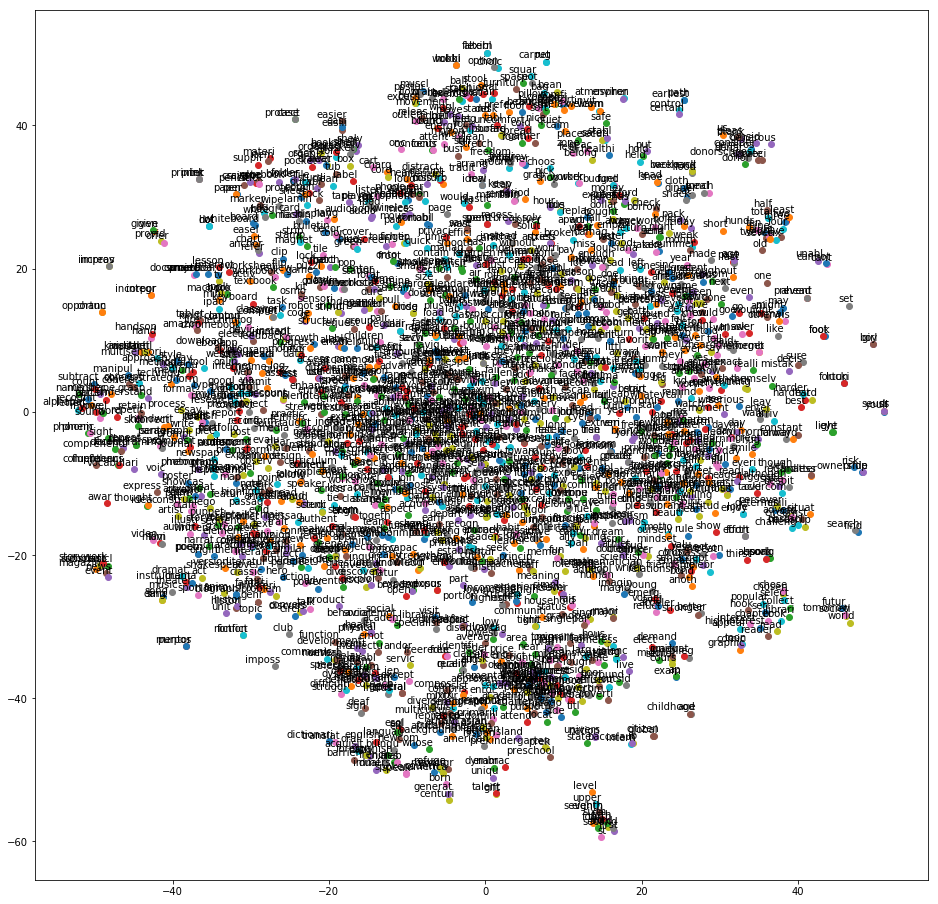

In [35]:
model = word2vec.Word2Vec(corpus, size=100, window=20, min_count=300, workers=4)
tsne_plot(model)

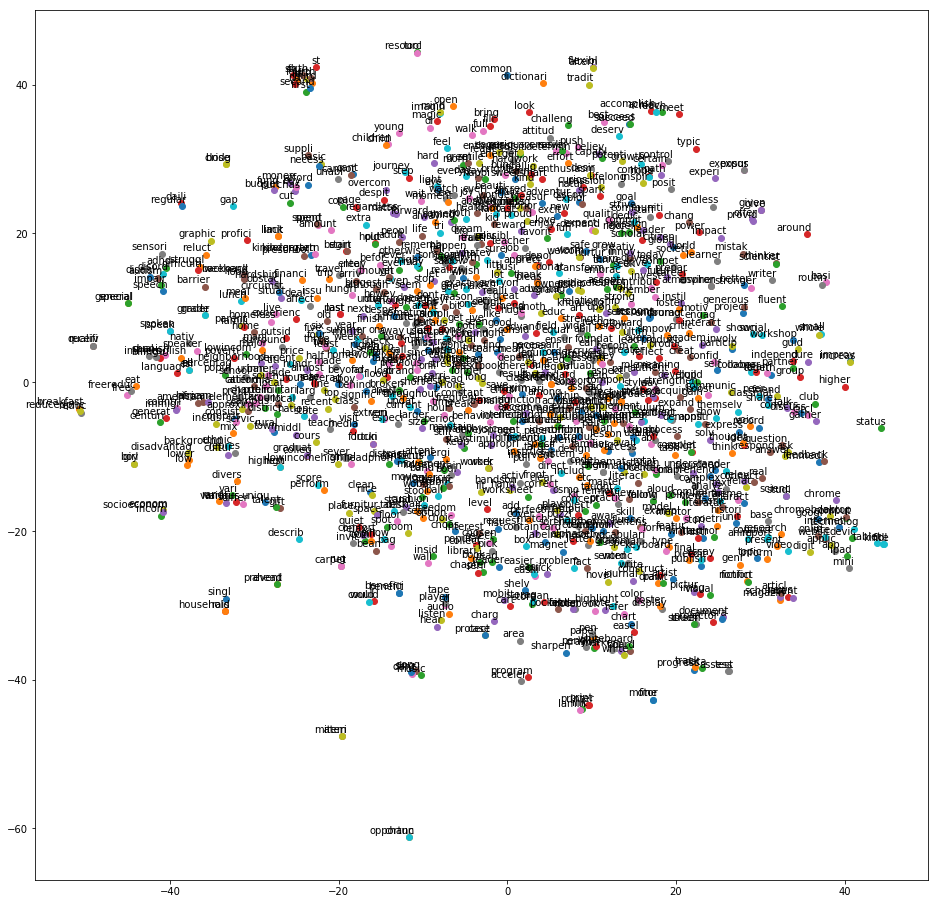

In [36]:
model = word2vec.Word2Vec(corpus, size=100, window=20, min_count=1000, workers=4)
tsne_plot(model)